In [92]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [93]:
img = cv2.imread('eita.JPG')
lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [163]:
res = cv2.resize(lab,None,fx=0.3, fy=0.3, interpolation = cv2.INTER_LINEAR)

In [164]:
luminance = res[:,:,0]

In [1]:
def box_counting_dimension(gray_img):

	def get_box_sizes(gray_img):
		min_dim = min(gray_img.shape)
		n 		= int(np.floor(np.log(min_dim)/np.log(2)))
		sizes 	= 2**np.arange(n, 1, -1)
		return sizes

	def box_count(gray_img, k):
		img_sum = np.add.reduceat(np.add.reduceat(gray_img, np.arange(0, gray_img.shape[0], k), axis=0), np.arange(0, gray_img.shape[1], k), axis=1)

		return len(np.where((img_sum > 0) & (img_sum < k*k*255))[0])

	gray_img[gray_img != 255] = 0

	sizes = get_box_sizes(gray_img)
	
	counts 	= []
	for size in sizes:
		counts.append(box_count(gray_img, size))

	coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
	return -coeffs[0]

In [13]:
box_counting_dimension(res)

1.0590457355868765

In [56]:
xx, yy = np.mgrid[0:res.shape[0], 0:res.shape[1]]

In [116]:
def otsu_thresholding(color_img):
# 	gray_img 				= cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
	__, mask 				= cv2.threshold(color_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
	inv_mask				= cv2.bitwise_not(mask)
	thr_img 				= cv2.bitwise_and(color_img, color_img, mask = inv_mask)
	thr_img[thr_img == 0] 	= 255

	return thr_img, inv_mask

In [165]:
a, b = cv2.threshold(luminance, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
inv_mask = cv2.bitwise_not(b)
l = luminance.copy()
thr_img = cv2.bitwise_and(l, l, mask=inv_mask)

In [170]:
luminance[luminance<=a] = 0
luminance[luminance>a] = 1

<IPython.core.display.Javascript object>


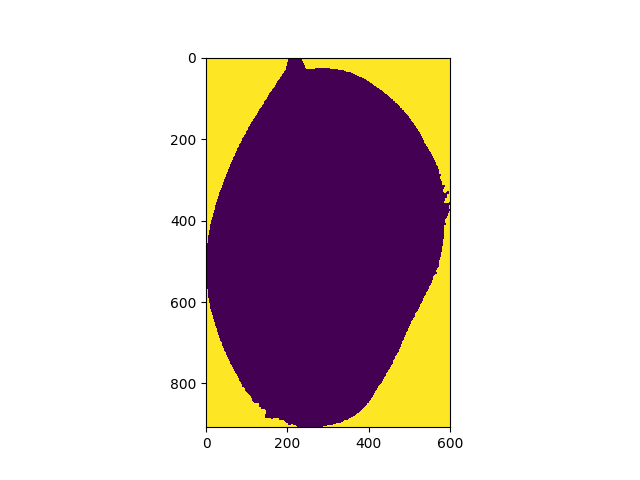

In [171]:
plt.imshow(luminance)

In [148]:
luminance[luminance > a]

array([], dtype=uint8)

In [143]:
luminance[luminance > a] = 1
luminance[luminance <= a] = 0

In [146]:
luminance[luminance==1].shape

(0,)

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, luminance)